In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_excel('Food_Cost_Train.xlsx')
test=pd.read_excel('Food_Cost_Test.xlsx')

In [72]:
train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [73]:
test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [74]:
print(train.shape,test.shape)

(12690, 9) (4231, 8)


In [75]:
print(train.columns,test.columns)

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object') Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')


In [91]:
print(train.info(),test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
TITLE            12690 non-null object
RESTAURANT_ID    12690 non-null int64
CUISINES         12690 non-null object
TIME             12690 non-null object
CITY             12578 non-null object
LOCALITY         12592 non-null object
RATING           12688 non-null object
VOTES            11486 non-null object
COST             12690 non-null int64
dtypes: int64(2), object(7)
memory usage: 892.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
TITLE            4231 non-null object
RESTAURANT_ID    4231 non-null int64
CUISINES         4231 non-null object
TIME             4231 non-null object
CITY             4196 non-null object
LOCALITY         4201 non-null object
RATING           4229 non-null object
VOTES            3829 non-null object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB
None None


In [92]:
train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

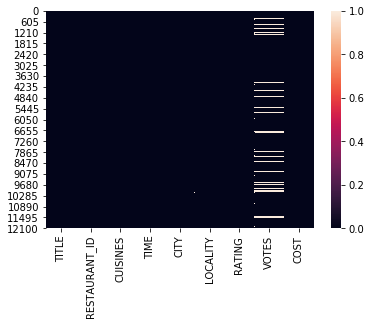

In [93]:
#To check missing value
sns.heatmap(train.isnull())

In [3]:
train['CITY'].fillna(train['CITY'].mode()[0], inplace=True)
train['LOCALITY'].fillna(train['LOCALITY'].mode()[0], inplace=True)
train['RATING'].fillna(train['RATING'].mode()[0], inplace=True)
train['VOTES'].fillna(train['VOTES'].mode()[0], inplace=True)

In [95]:
test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

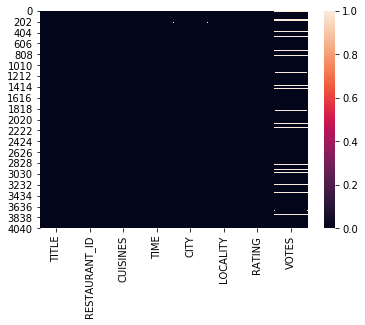

In [96]:
#To check missing value
sns.heatmap(test.isnull())

In [4]:
test['CITY'].fillna(test['CITY'].mode()[0], inplace=True)
test['LOCALITY'].fillna(test['LOCALITY'].mode()[0], inplace=True)
test['RATING'].fillna(test['RATING'].mode()[0], inplace=True)
test['VOTES'].fillna(test['VOTES'].mode()[0], inplace=True)

In [36]:
train.duplicated().sum()

25

In [5]:
#Removing Duplicates
train=train.drop_duplicates()

In [38]:
test.duplicated().sum()

1

In [6]:
#Removing Duplicates
test=test.drop_duplicates()

In [40]:
train.nunique()

TITLE              113
RESTAURANT_ID    11892
CUISINES          4155
TIME              2689
CITY               359
LOCALITY          1416
RATING              32
VOTES             1847
COST                86
dtype: int64

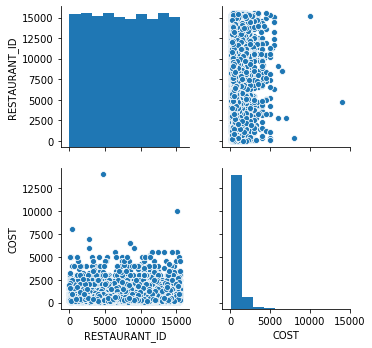

In [41]:
sns.pairplot(train)

In [7]:
data=pd.concat([train,test])
data =data.reset_index(drop=True)

Label Encoder

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 

In [9]:
for col in train.columns:
    dtype=train[col].dtypes
    if dtype=='object':
        le=LabelEncoder()
        train[col]=le.fit_transform(train[col])

In [10]:
train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,9438,2627,739,320,285,17,1278,1200
1,33,13198,289,1885,67,1046,23,950,1500
2,31,10915,2976,661,67,1101,19,712,800
3,95,6346,4130,275,222,136,22,787,800
4,50,15387,1766,615,222,620,19,470,300


In [11]:
for col in test.columns:
    dtype=test[col].dtypes
    if dtype=='object':
        le=LabelEncoder()
        test[col]=le.fit_transform(test[col])

In [12]:
test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,23,4085,1293,503,110,662,23,823
1,75,12680,1632,933,96,221,22,871
2,23,1411,1455,219,96,411,18,575
3,66,204,208,1071,41,456,18,179
4,75,13453,1637,208,78,300,16,394


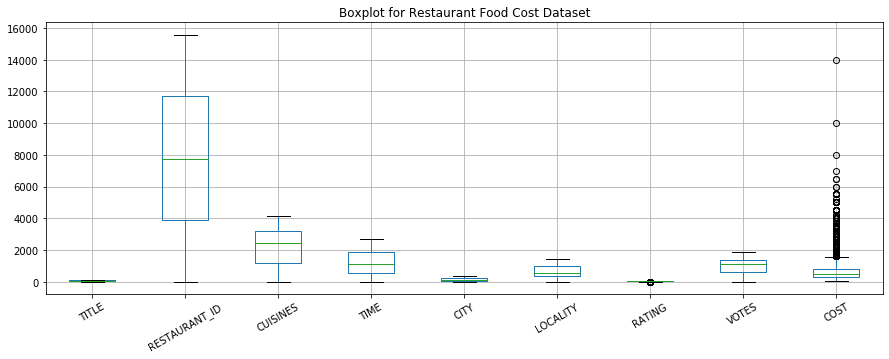

In [13]:
train.plot(kind='box',grid=True,title="Boxplot for Restaurant Food Cost Dataset",legend=True,rot=30,figsize=(15,5))

In [14]:
#check for Outlier
from scipy.stats import zscore
z_score=abs(zscore(train))
print(train.shape)
train=train.loc[(z_score < 3).all(axis=1)]
print(train.shape)

(12665, 9)
(11948, 9)


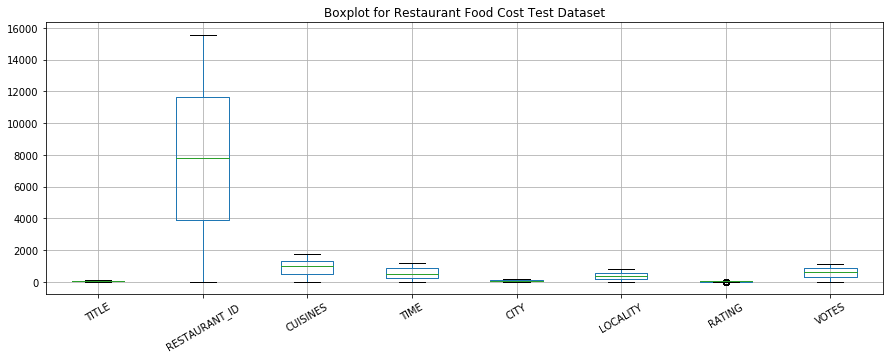

In [15]:
test.plot(kind='box',grid=True,title="Boxplot for Restaurant Food Cost Test Dataset",legend=True,rot=30,figsize=(15,5))

In [16]:
#check for Outlier
from scipy.stats import zscore
z_score=abs(zscore(test))
print(test.shape)
test=test.loc[(z_score < 3).all(axis=1)]
print(test.shape)

(4230, 8)
(4230, 8)


In [17]:
#Check Skewness
train.skew()

TITLE           -0.071850
RESTAURANT_ID    0.003987
CUISINES        -0.215489
TIME             0.341419
CITY             0.308341
LOCALITY         0.344195
RATING           0.142161
VOTES           -0.263411
COST             1.738119
dtype: float64

In [18]:
for col in train.columns:
    if train.skew().loc[col] > 0.55:
        train[col]=np.log1p(train[col])
    if train.skew().loc[col]<=0.55:
        train[col]=np.log1p(train[col])

In [19]:
train.skew()

TITLE           -2.110393
RESTAURANT_ID   -1.992822
CUISINES        -1.856774
TIME            -1.494479
CITY            -0.441740
LOCALITY        -1.039332
RATING          -1.140946
VOTES           -2.892593
COST            -0.067696
dtype: float64

In [20]:
#Check Skewness
test.skew()

TITLE           -0.020354
RESTAURANT_ID    0.007058
CUISINES        -0.210741
TIME             0.314174
CITY             0.087155
LOCALITY         0.312940
RATING          -0.728937
VOTES           -0.193407
dtype: float64

In [21]:
for col in test.columns:
    if test.skew().loc[col] > 0.55:
        test[col]=np.log1p(test[col])
    if test.skew().loc[col]<=0.55:
        test[col]=np.log1p(test[col])

In [22]:
test.skew()

TITLE           -1.748783
RESTAURANT_ID   -1.847965
CUISINES        -1.758231
TIME            -1.338315
CITY            -0.584194
LOCALITY        -1.222024
RATING          -3.313054
VOTES           -2.326965
dtype: float64

In [23]:
train.describe()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
count,11948.000000,11948.000000,11948.000000,11948.000000,11948.000000,11948.000000,11948.000000,11948.000000,11948.000000
mean,3.865462,8.647166,7.439980,6.731903,4.730052,6.217858,2.987291,6.635970,1.968201
std,0.859900,1.007958,0.920756,0.977082,0.720921,0.826750,0.268655,0.964523,0.093482
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,1.595709
25%,3.465736,8.258358,7.074963,6.320768,4.219508,5.823046,2.890372,6.375025,1.903168
50%,4.060443,8.957511,7.781765,7.024649,4.882802,6.368187,2.995732,6.975414,1.976385
75%,4.564348,9.368903,8.080934,7.512754,5.407172,6.917706,3.135494,7.212294,2.030961
max,4.727388,9.653358,8.332068,7.896925,5.883322,7.255591,3.465736,7.521318,2.177526


In [24]:
train.corr()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
TITLE,1.000000,0.022809,0.296737,0.058000,-0.011147,0.016161,-0.059438,0.017034,-0.254042
RESTAURANT_ID,0.022809,1.000000,0.068146,0.006339,-0.000676,0.007171,0.014488,0.013708,0.012185
CUISINES,0.296737,0.068146,1.000000,0.078694,0.042104,0.018034,-0.031888,-0.005620,-0.042149
TIME,0.058000,0.006339,0.078694,1.000000,-0.014159,0.000650,0.040044,0.011062,0.029537
CITY,-0.011147,-0.000676,0.042104,-0.014159,1.000000,0.042322,0.012613,0.005807,0.037047
LOCALITY,0.016161,0.007171,0.018034,0.000650,0.042322,1.000000,-0.019552,-0.002782,-0.000170
RATING,-0.059438,0.014488,-0.031888,0.040044,0.012613,-0.019552,1.000000,0.060616,0.185653
VOTES,0.017034,0.013708,-0.005620,0.011062,0.005807,-0.002782,0.060616,1.000000,-0.016400
COST,-0.254042,0.012185,-0.042149,0.029537,0.037047,-0.000170,0.185653,-0.016400,1.000000


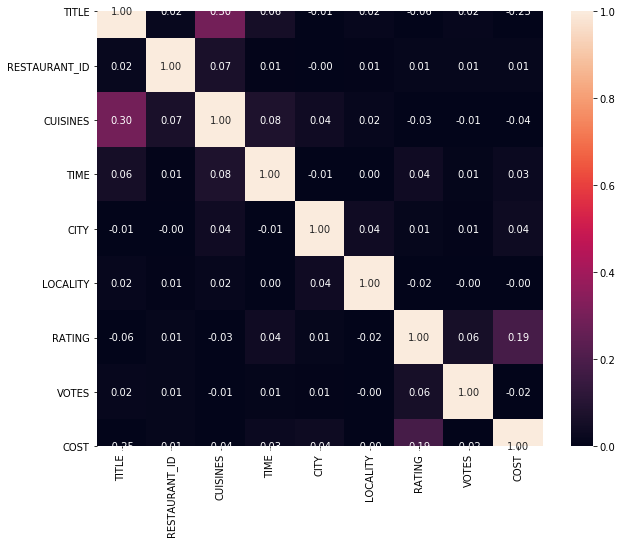

In [25]:
#showing the corelation with a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(),annot=True,fmt='.2f',vmax=1,vmin=0)
plt.show()

Features and Target Value

In [26]:
x=train.drop("COST",axis=1)
y=train["COST"]

In [27]:
x.head(2)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,3.465736,9.152605,7.873978,6.606650,5.771441,5.655992,2.890372,7.153834
1,3.526361,9.487896,5.669881,7.542213,4.219508,6.953684,3.178054,6.857514


In [28]:
y.head(2)

0    2.090741
1    2.117927
Name: COST, dtype: float64

In [29]:
y=np.array(y)
y=y.reshape(-1,1)
y.shape

(11948, 1)

Standardisation

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(x)
x

array([[-0.46487173,  0.50146957,  0.47136927, ..., -0.67963632,
        -0.36077344,  0.53693472],
       [-0.39436684,  0.83412722, -1.92252112, ...,  0.89006019,
         0.71009316,  0.22970292],
       [-0.46487173,  0.64570732,  0.60679946, ...,  0.95198933,
         0.03142013, -0.0689366 ],
       ...,
       [ 0.47821952,  0.6653259 ,  0.22206636, ...,  1.19122424,
         0.38620236,  0.65191488],
       [-0.46487173,  0.07401343,  0.78475289, ...,  0.27945735,
        -0.57353969,  0.27867914],
       [-0.46487173,  0.12076332,  0.59579893, ...,  1.18309089,
        -0.79920854,  0.70632978]])

Spilt Train and Test

In [31]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [32]:
def mod(model,x,y):
    max_r=0
    for i in range(30,150):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        r2score=r2_score(y_test,pred)
        MAE= mean_absolute_error(y_test,pred)
        MSE= mean_squared_error(y_test,pred)
        RMSE=np.sqrt(MSE)
        if r2score > max_r:
            max_r=r2score
            random_state=i
    print('the random state at ', mod,'\nis: ',random_state, 
          '\nand it produces \n r2 score of ',r2score,
          '\n mean abs error value of ', MAE,
          '\n mean squared error value of',MSE,
          '\n & root mean sq error ', RMSE)
    print()
    print('prediction: ',pred)
    return random_state

LinearRegression

In [137]:
lr=LinearRegression()
mod(lr,x,y)

the random state at  <function mod at 0x0000004F2A5CEE58> 
is:  48 
and it produces 
 r2 score of  0.10276873327142055 
 mean abs error value of  0.07031664119255808 
 mean squared error value of 0.007994810750143088 
 & root mean sq error  0.08941370560570168

prediction:  [[1.99181767]
 [1.93748113]
 [1.93642823]
 ...
 [1.95723612]
 [1.97394421]
 [1.93680792]]


48

In [138]:
#cross validation
lr_scr=cross_val_score(lr,x,y,cv=10,scoring='r2')
print('the r2 score at liner regression model is=', lr_scr.mean())

the r2 score at liner regression model is= 0.09546173139196487


Decision Tree Regressor

In [139]:
dtr=DecisionTreeRegressor()
dtr_para={'criterion':['mse','friedman_mse','mae'],'max_depth':[6,8,9]}
dtr_grid=GridSearchCV(dtr,dtr_para,cv=10)
dtr_grid.fit(x,y)
dtr_grid.best_params_

{'criterion': 'friedman_mse', 'max_depth': 8}

In [33]:
dtr=DecisionTreeRegressor(criterion='friedman_mse',max_depth=8)
mod(dtr,x,y)

the random state at  <function mod at 0x00000030BE8DE048> 
is:  137 
and it produces 
 r2 score of  0.5936847753094272 
 mean abs error value of  0.046000329679370046 
 mean squared error value of 0.0036204860962404132 
 & root mean sq error  0.06017047528680834

prediction:  [1.91209161 1.91862288 1.9166762  ... 1.94756943 2.0000804  1.88612143]


137

In [141]:
#Cross Validation
dtr_scr=cross_val_score(dtr,x,y,cv=10,scoring='r2')
print('the r2 score at DTR model is=', dtr_scr.mean())

the r2 score at DTR model is= 0.585192626822334


KNeighbors Regressor

In [142]:
knr=KNeighborsRegressor()
k_para={'n_neighbors': range(4,20),'algorithm':['ball_tree', 'kd_tree', 'brute','auto']}
k_grid=GridSearchCV(knr,k_para,cv=20)
k_grid.fit(x,y)
k_grid.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 17}

In [143]:
knr=KNeighborsRegressor(algorithm='ball_tree',n_neighbors=17)
mod(knr,x,y)

the random state at  <function mod at 0x0000004F2A5CEE58> 
is:  141 
and it produces 
 r2 score of  0.3602777136279738 
 mean abs error value of  0.057938278789918266 
 mean squared error value of 0.005700267926285231 
 & root mean sq error  0.0755001187170274

prediction:  [[1.91242913]
 [1.94410816]
 [1.89995335]
 ...
 [1.95180987]
 [1.99233448]
 [1.94029571]]


141

In [144]:
#Cross Validation
knr_scr=cross_val_score(knr,x,y,cv=20,scoring='r2')
print('the r2 score at KNR model is=', knr_scr.mean())

the r2 score at KNR model is= 0.3652030514584224


AdaBoost Regressor

In [147]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

ada_param= {"learning_rate": [0.0001,0.025,0.1,1.0],"n_estimators":[250,500,750,1000]}

ada_g= GridSearchCV(ada,ada_param,cv=10)
ada_g.fit(x_train,y_train)
print("best parameters:", ada_g.best_params_)
print("\n best score:",ada_g.best_score_)

best parameters: {'learning_rate': 0.025, 'n_estimators': 500}

 best score: 0.3737521130315087


In [148]:
ada=AdaBoostRegressor(learning_rate=0.025, n_estimators=500)
mod(ada,x,y)

the random state at  <function mod at 0x0000004F2A5CEE58> 
is:  36 
and it produces 
 r2 score of  0.38267676622262126 
 mean abs error value of  0.058421876644635995 
 mean squared error value of 0.005500680380557314 
 & root mean sq error  0.07416657185388384

prediction:  [1.96409284 1.91401178 1.90588808 ... 1.95977162 1.98686534 1.91286878]


36

In [149]:
#Cross Validation
ada_scr=cross_val_score(ada,x,y,cv=10,scoring='r2')
print('the r2 score at AdaBoost Reg model is=', ada_scr.mean())

the r2 score at AdaBoost Reg model is= 0.3676444352867572


In [34]:
import joblib
joblib.dump(dtr,"DTR_FoodCost.pkl")

['DTR_FoodCost.pkl']

In [35]:
# Load the model from the file 
model=joblib.load('DTR_FoodCost.pkl')  
  
# Use the loaded model to make predictions 
model.predict(test)

array([1.94600995, 1.94600995, 1.94600995, ..., 1.94600995, 1.94600995,
       1.94600995])